In [1]:
###Problem Set 5 Question 4 and 5

#Question 4
#Using the LifeExpectancy data in the country table on the y-axis, plot this data against some other value.
#Suggestions for the x-axis: GNP, Population or IndepYear could be interesting, but up to you.
#I'd suggest using SQLAlchemy, get the data and make either a dataframe or numpy arrays and then
#use matplotlib to plot.

In [2]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
import sqlite3

#Question 4

# Create a Engine object which is our handle into the database.
engine = create_engine('sqlite:////blue/bsc4452/admontalvo/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
#  Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DBInfo=MetaData(engine)

In [3]:
# Auto-create the country object based on the metadata read into the DBInfo.
country=Table('country', DBInfo, autoload=True)

# Mirroring this command: SELECT Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2  FROM country LIMIT 10;
query=select([country.c.Code, country.c.Name, country.c.Continent, country.c.Region, country.c.SurfaceArea, country.c.IndepYear,
              country.c.Population, country.c.LifeExpectancy, country.c.GNP, country.c.GNPOld, country.c.LocalName,
              country.c.GovernmentForm, country.c.HeadOfState, country.c.Capital, country.c.Code2]).limit(10) #obtaining all the columns from the sqL database in the country table. country.c.LifeExpectancy is refering to the table.column(c).desiired column
result = conn.execute(query)
for row in result:
    print(row)
    
print(type(query))

('ABW', 'Aruba', 'North America', 'Caribbean', Decimal('193.0000000000'), None, 103000, Decimal('78.4000000000'), Decimal('828.0000000000'), Decimal('793.0000000000'), 'Aruba', 'Nonmetropolitan Territory of The Netherlands', 'Beatrix', 129, 'AW')
('AFG', 'Afghanistan', 'Asia', 'Southern and Central Asia', Decimal('652090.0000000000'), 1919, 22720000, Decimal('45.9000000000'), Decimal('5976.0000000000'), None, 'Afganistan/Afqanestan', 'Islamic Emirate', 'Mohammad Omar', 1, 'AF')
('AGO', 'Angola', 'Africa', 'Central Africa', Decimal('1246700.0000000000'), 1975, 12878000, Decimal('38.3000000000'), Decimal('6648.0000000000'), Decimal('7984.0000000000'), 'Angola', 'Republic', 'Jos� Eduardo dos Santos', 56, 'AO')
('AIA', 'Anguilla', 'North America', 'Caribbean', Decimal('96.0000000000'), None, 8000, Decimal('76.1000000000'), Decimal('63.2000000000'), None, 'Anguilla', 'Dependent Territory of the UK', 'Elisabeth II', 62, 'AI')
('ALB', 'Albania', 'Europe', 'Southern Europe', Decimal('28748.000

In [4]:
#creating the dataframe with pandas
import pandas as pd

df=pd.read_sql(query, conn, index_col='Code') #need to make sure python kernal is 3.10

df.head()

,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
Code,,,,,,,,,,,,,,
ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129,AW
AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1,AF
AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jos� Eduardo dos Santos,56,AO
AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62,AI
ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqip�ria,Republic,Rexhep Mejdani,34,AL


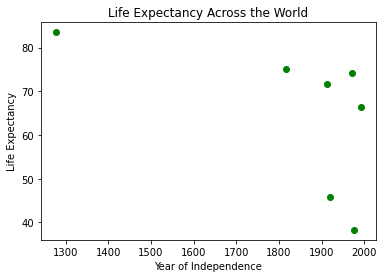

In [5]:
#plotting LifeExpectancy Vs other values using matplotlib
import numpy as np
import matplotlib.pyplot as plt

#selecting the columns to put on the X and Y axisi. The X axis goes in the
#first set of brackets and the Y axis in the second set

plt.scatter(df["IndepYear"], df["LifeExpectancy"], color = "green", label = "Life Expectancy Vs Year of Independence")

#Other potential variables from the dataset to at to compare to life expectanacy 
#plt.scatter(df["GNP"], df["LifeExpectancy"], color = "blue", label = "Life Expectancy Vs GNP") 
#plt.scatter(df["Population"], df["LifeExpectancy"], color = "red", label = "Life Expectancy Vs Population")
#plt.scatter(df["SurfaceArea"], df["LifeExpectancy"], color = "teal", label = "Life Expectancy Vs Population")



#Adding X and Y axis labels
plt.xlabel("Year of Independence")
plt.ylabel("Life Expectancy")

#Adding a title
plt.title("Life Expectancy Across the World")
#Showing the graph
plt.show()



In [6]:
### Problem Set 5 Question 5 
#Plot LifeExpectancy vs the ratio of the total population of all the cities in the country
#divided by the total population of the country. 
#This is an approximation of the % urban population in the country.

In [33]:
# Auto-create the city object based on the metadata read into the DBInfo.
city=Table('city', DBInfo, autoload=True)

# Mirroring this command: SELECT Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2  FROM country LIMIT 10;
query=select([city.c.ID, city.c.Name, city.c.CountryCode, city.c.District, city.c.Population]).limit(10) #obtaining all the columns from the sqL database in the city table. country.c.LifeExpectancy is refering to the table.column(c).desiired column
city_result = conn.execute(query)
for row_cit in city_result:
    print(row_cit)
    
print(type(query))

(1, 'Kabul', 'AFG', 'Kabol', 1780000)
(2, 'Qandahar', 'AFG', 'Qandahar', 237500)
(3, 'Herat', 'AFG', 'Herat', 186800)
(4, 'Mazar-e-Sharif', 'AFG', 'Balkh', 127800)
(6, 'Rotterdam', 'NLD', 'Zuid-Holland', 593321)
(7, 'Haag', 'NLD', 'Zuid-Holland', 440900)
(8, 'Utrecht', 'NLD', 'Utrecht', 234323)
(9, 'Eindhoven', 'NLD', 'Noord-Brabant', 201843)
(10, 'Tilburg', 'NLD', 'Noord-Brabant', 193238)
(11, 'Groningen', 'NLD', 'Groningen', 172701)
<class 'sqlalchemy.sql.selectable.Select'>


In [34]:
#creating the city dataframe with pandas
import pandas as pd

df_city=pd.read_sql(query, conn, index_col='ID') #need to make sure python kernal is 3.10

df_city.head()

,Name,CountryCode,District,Population
ID,,,,
1,Kabul,AFG,Kabol,1780000
2,Qandahar,AFG,Qandahar,237500
3,Herat,AFG,Herat,186800
4,Mazar-e-Sharif,AFG,Balkh,127800
6,Rotterdam,NLD,Zuid-Holland,593321


In [9]:
# Mirroring this command: SELECT Name and Population FROM city table LIMIT 10;
query=select([city.c.Name, city.c.Population]).limit(10) #obtaining all the columns from the sqL database in the city table. country.c.LifeExpectancy is refering to the table.column(c).desiired column
city_result = conn.execute(query)
for row_cit in city_result:
    print(row_cit)
    
print(type(query))

('Kabul', 1780000)
('Qandahar', 237500)
('Herat', 186800)
('Mazar-e-Sharif', 127800)
('Rotterdam', 593321)
('Haag', 440900)
('Utrecht', 234323)
('Eindhoven', 201843)
('Tilburg', 193238)
('Groningen', 172701)
<class 'sqlalchemy.sql.selectable.Select'>


In [21]:
#Obtaining the total Population of all the cities in the "city" table
import sqlalchemy as db
  
# Define the Engine (Connection Object)
engine = db.create_engine(
    "sqlite:////blue/bsc4452/admontalvo/world.sqlite")
  
# Create the Metadata Object
meta_data = db.MetaData(bind=engine)
db.MetaData.reflect(meta_data)
  
# Get the `students` table from the Metadata object
cities = meta_data.tables['city']
  
# SQLAlchemy Query to get AVG
query = db.select([db.func.round(db.func.avg(city.c.Population), 2)])
  
# Fetch the records
avg_result_city = engine.execute(query).fetchall()
  
# SQLAlchemy Query to get SUM
query = db.select([db.func.round(db.func.sum(city.c.Population), 2)])
  
# Fetch the records
sum_result_city = engine.execute(query).fetchall()
  
# View the records
print("\nAverage: ", avg_result_city[0])
print("\nSum: ", sum_result_city[0])


Average:  (360407.16,)

Sum:  (1472623647.0,)


In [23]:
#Obtaining the total Population of all the countries in the "country" table
import sqlalchemy as db
  
# Define the Engine (Connection Object)
engine = db.create_engine(
    "sqlite:////blue/bsc4452/admontalvo/world.sqlite")
  
# Create the Metadata Object
meta_data = db.MetaData(bind=engine)
db.MetaData.reflect(meta_data)
  
# Get the `students` table from the Metadata object
country = meta_data.tables['country']
  
# SQLAlchemy Query to get AVG
query_country = db.select([db.func.round(db.func.avg(country.c.Population), 2)])
  
# Fetch the records
avg_result_1_country = engine.execute(query).fetchall()
  
# SQLAlchemy Query to get SUM
query_country = db.select([db.func.round(db.func.sum(country.c.Population), 2)])
  
# Fetch the records
sum_result_country = engine.execute(query).fetchall()
  
# View the records
print("\nAverage: ", avg_result_1_country[0])
print("\nSum: ", sum_result_country[0])


Average:  (1472623647.0,)

Sum:  (1472623647.0,)


In [27]:
#Obtaining ratio of total population of cities and  
a = sum_result_country
b = sum_result_city
result = b/a
print(result)


TypeError: unsupported operand type(s) for //: 'list' and 'list'

In [29]:
#plotting LifeExpectancy Vs other values using matplotlib
import numpy as np
import matplotlib.pyplot as plt

#selecting the columns to put on the X and Y axisi. The X axis goes in the
#first set of brackets and the Y axis in the second set

plt.scatter((df["Population"], df["LifeExpectancy"], color = "green", label = "Life Expectancy Vs Population")

#Other potential variables from the dataset to at to compare to life expectanacy 
#plt.scatter(df["GNP"], df["LifeExpectancy"], color = "blue", label = "Life Expectancy Vs GNP") 
#plt.scatter(df["Population"], df["LifeExpectancy"], color = "red", label = "Life Expectancy Vs Population")
#plt.scatter(df["SurfaceArea"], df["LifeExpectancy"], color = "teal", label = "Life Expectancy Vs Population")



#Adding X and Y axis labels
plt.xlabel("Year of Independence")
plt.ylabel("Life Expectancy")

#Adding a title
plt.title("Life Expectancy Across the World")
#Showing the graph
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2736349194.py, line 8)